# Game Theory 
## Section 1: Best Response
In two player games where $(a,b)\in{\mathbb{R}^{m\times n}}^2$ is a mixed strategy ($\sigma_r^*$) of the players best response to a column players strategy ($\sigma_c$) if:
- $\sigma_r^*=\text{maxarg}_{\sigma_r\in S_r}\sigma_ra\sigma_c^T$

In a mixed strategy $\sigma_c^*$ of the column players is a best response to a row players strategy $\sigma_r$ if:
- $\sigma_c^*=\text{maxarg}_{\sigma_c\in S_c}\sigma_ry\sigma_c^T$

Essentially a best response strategy maximises the utility of aplayer given a known strategy of the opponet player.

### Best Response in a Prisoners Dilemma game
The prisoners Dilemma: $a = \begin{pmatrix}
3 & 0\\
5 & 1
\end{pmatrix}\qquad
b = \begin{pmatrix}
3 & 5\\
0 & 1
\end{pmatrix}$

We can see the strategies best responses by underylying the corresponding utilities. For the row players, we will underline the best utility in each column:
- $a = \begin{pmatrix}
  3 & 0\\
  \underline{5} & \underline{1}
  \end{pmatrix}$

For the column players we underlining the best utility in each row:
- $b = \begin{pmatrix}
  3 & \underline{5}\\
  0 & \underline{1}
  \end{pmatrix}$

We can easily identify both players vbest responses are their second strategy.

### Best responses in a Matching Pennies game
The best responses are underlined: $a = \begin{pmatrix}
\underline{1} & -1\\
-1 & \underline{1}
\end{pmatrix}\qquad
b = \begin{pmatrix}
-1 & \underline{1}\\
\underline{1} & -1
\end{pmatrix}$

- Now the best response is dependent on how the opponent player reacts.

Best responses against mixed stratgies applying the previous definition:
- $\sigma_r=(x,1-x)$
- $\sigma_c=(y,1-y)$

Resulting:
- $a\sigma_c^T = \begin{pmatrix}
2y-1\\
1-2y
\end{pmatrix}\qquad
\sigma_ry = \begin{pmatrix}
1-2x & 2x-1
\end{pmatrix}$

In [53]:
import sympy as sym
import numpy as np
sym.init_printing()

a = sym.Matrix([[1, -1], [-1, 1]])
b = - a
x, y = sym.symbols('x, y')
sigma_r = sym.Matrix([[x, 1-x]])
sigma_c = sym.Matrix([y, 1-y])
a * sigma_c, sigma_r * b

⎛⎡2⋅y - 1⎤                      ⎞
⎜⎢        ⎥, [1 - 2⋅x  2⋅x - 1]⎟
⎝⎣1 - 2⋅y⎦                      ⎠

- These vectors give us the utilities to the row and column players when they play either of their strategies:
- $(a\sigma_c^T)_i$ is the utility of the row player when playing strategy i against $\sigma_c=(y, 1-y)$

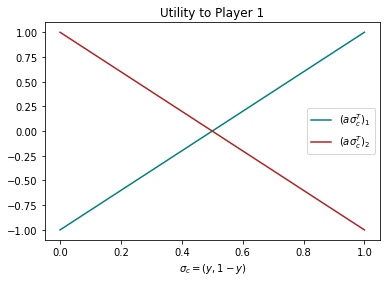

In [54]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc("savefig", dpi=100)  # Increase the quality of the images (not needed)

bs = [0, 1]
row_us = [[(a * sigma_c)[i].subs({y: val}) for val in ys] for i in range(2)]
plt.plot(ys, row_us[0], label="$(a\sigma_c^T)_1$", color='teal')
plt.plot(ys, row_us[1], label="$(a\sigma_c^T)_2$", color='firebrick')
plt.xlabel("$\sigma_c=(y, 1-y)$")
plt.title("Utility to Player 1")
plt.legend();

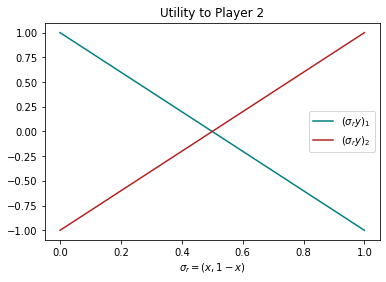

In [55]:
ass = [0, 1]
row_us = [[(sigma_r * b)[j].subs({x: val}) for val in ass] for j in range(2)]
plt.plot(ass, row_us[0], label="$(\sigma_ry)_1$", color='teal')
plt.plot(ass, row_us[1], label="$(\sigma_ry)_2$", color='firebrick')
plt.xlabel("$\sigma_r=(x, 1-x)$")
plt.title("Utility to Player 2")
plt.legend();

The best responses to mixed strategies are as following:
- $\sigma_r^* = 
\begin{cases}
(1, 0),&\text{ if } y > 1/2\\
(0, 1),&\text{ if } y < 1/2\\
\text{indifferent},&\text{ if } y = 1/2
\end{cases}
\qquad
\sigma_c^* = 
\begin{cases}
(0, 1),&\text{ if } x > 1/2\\
(1, 0),&\text{ if } x < 1/2\\
\text{indifferent},&\text{ if } x = 1/2
\end{cases}$

For any given strategy the opponents best response is either a pure strategy or a miaed strategy which case they are indifferent the pure strategies.

Example:
- if $\sigma_c=(1/4, 3/4) (y=1/4)$ then best response is $\sigma_r^*=(0,1)$
- if $\sigma_c=(1/2, 1/2) (y=1/2)$ then any miaed strategy is the best response. (Using both pure strategies would also provide the same utility.)

### Best response condition
Two player games $(a,b)\in{\mathbb{R}^{m\times n}}^2$ a mixed strategy $\sigma_r^*$ of the row player is a best response to a column players strategy \sigma_c if:
- ${\sigma_r^*}_i > 0 \Rightarrow (a\sigma_c^T)_i = \max_{k}(a\sigma_c^T)_k\text{ for all }1\leq i\leq m$


### Proof
$(a\sigma_c^T)_i$ is the utility of the row player when they play their $i$ strategy:
- $\sigma_ra\sigma_c^T=\sum_{i=1}^{m}{\sigma_r}_i(a\sigma_c^T)_i$

$u=\max_{k}(a\sigma_c^T)_k$:
\begin{align}
 \sigma_ra\sigma_c^T&=\sum_{i=1}^{m}{\sigma_r}_i(u - u + (a\sigma_c^T)_i)\\
                   &=\sum_{i=1}^{m}{\sigma_r}_iu - \sum_{i=1}^{m}{\sigma_r}_i(u - (a\sigma_c^T)_i)\\
                   &=u - \sum_{i=1}^{m}{\sigma_r}_i(u - (a\sigma_c^T)_i)
\end{align}

- If $\sigma_c=(1/2, 1/2), (a\sigma_c^T)=(0, 0)$, then $(a\sigma_c^T)_i = 0$ for all of $i$

While any strategy is a best response to (1/2, 1/2) the pair of strategies (\sigma_r, sigma_c) = ((1/2, 1/2),(1/2, 1/2)) are the only two strategies that are best responses to each other, this is called Nash Equilibrium.
- Nash Equilibrium: Two player game $(a,y)\in{\mathbb{R}^{m\times n}}^2$, $(\sigma_r, \sigma_c)$ is a Nash Equilibrium if $\sigma_r$ is a best response to $\sigma_c$ and vice versa.